In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv('drug200.csv')

In [62]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [63]:
df.shape

(200, 6)

# Explatory Data Analyse

In [64]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [65]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [66]:
df.corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


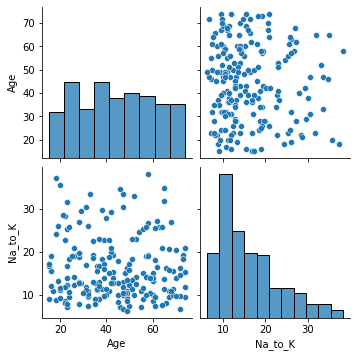

In [67]:
sns.pairplot(df)

# One Hot Encoding

In [68]:
gender = pd.get_dummies(df['Sex'], drop_first = True)

In [69]:
df = df.drop('Sex', axis = 1)

In [70]:
bp_rate = pd.get_dummies(df['BP'], drop_first = True)

In [71]:
bp_rate

,LOW,NORMAL
0,0,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
195,1,0
196,1,0
197,0,1
198,0,1


In [72]:
df = df.drop('BP', axis = 1)

In [73]:
chole = pd.get_dummies(df['Cholesterol'], drop_first = True)

In [74]:
chole

,NORMAL
0,0
1,0
2,0
3,0
4,0
...,...
195,0
196,0
197,0
198,1


In [75]:
df = df.drop('Cholesterol', axis = 1)

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
lenco = LabelEncoder()

In [78]:
df['Drug'] = lenco.fit_transform(df['Drug'])

In [79]:
df.Drug

0      4
1      2
2      2
3      3
4      4
      ..
195    2
196    2
197    3
198    3
199    3
Name: Drug, Length: 200, dtype: int32

In [80]:
df = pd.concat([df, gender, bp_rate, chole], axis = 1)

In [81]:
df.head()

,Age,Na_to_K,Drug,M,LOW,NORMAL,NORMAL
0,23,25.355,4,0,0,0,0
1,47,13.093,2,1,1,0,0
2,47,10.114,2,1,1,0,0
3,28,7.798,3,0,0,1,0
4,61,18.043,4,0,1,0,0


# Data Visulation 

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Na_to_K'}>,
        <AxesSubplot:title={'center':'Drug'}>],
       [<AxesSubplot:title={'center':'M'}>,
        <AxesSubplot:title={'center':'LOW'}>,
        <AxesSubplot:title={'center':'NORMAL'}>],
       [<AxesSubplot:title={'center':'NORMAL'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

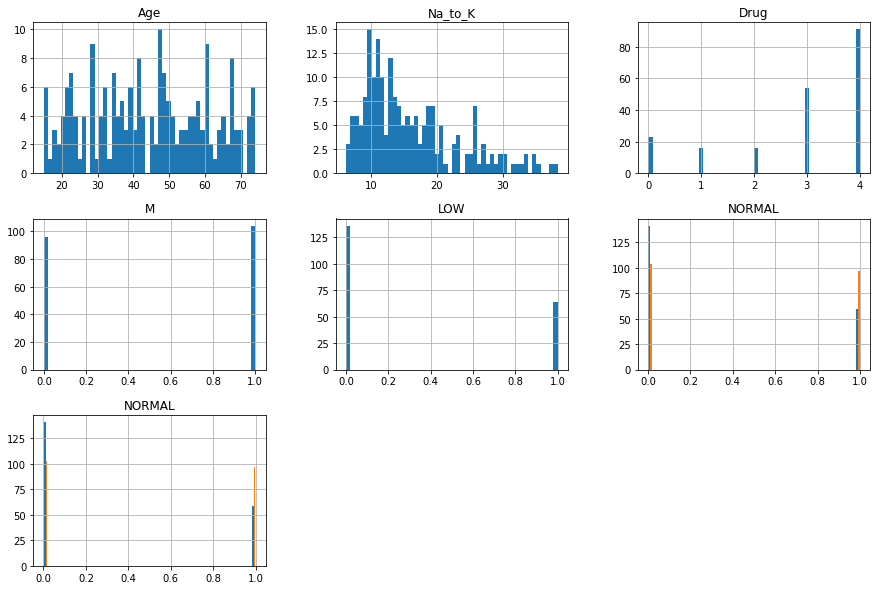

In [82]:
df.hist(bins= 50, figsize= (15, 10))

In [83]:
young = df[df['Age'] <= 30]
mid = df[(df['Age'] > 30) & (df['Age'] < 50)]
old = df[df['Age'] >= 50]

<AxesSubplot:ylabel='Density'>

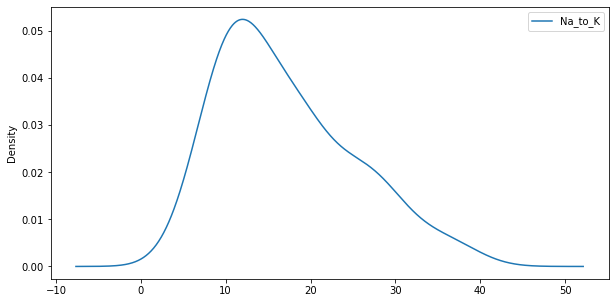

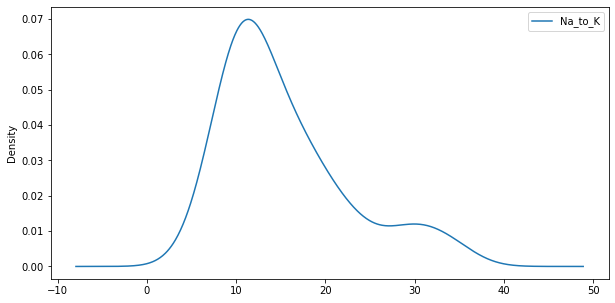

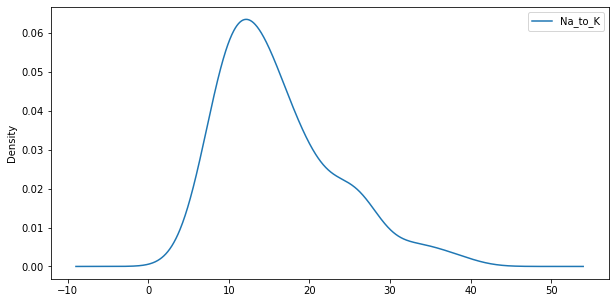

In [84]:
young[['Age', 'Na_to_K']].plot(kind='density', x='Age', y='Na_to_K', figsize=(10,5))
mid[['Age', 'Na_to_K']].plot(kind='density', x='Age', y='Na_to_K', figsize=(10,5))
old[['Age', 'Na_to_K']].plot(kind='density', x='Age', y='Na_to_K', figsize=(10,5))

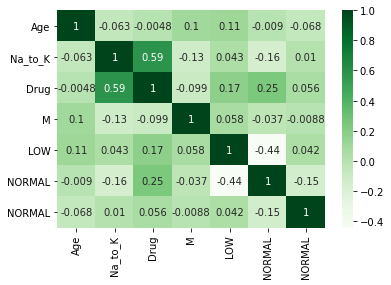

In [85]:
ax = sns.heatmap(data = df.corr(), cmap = 'Greens', annot = True)

Text(0, 0.5, 'Ages')

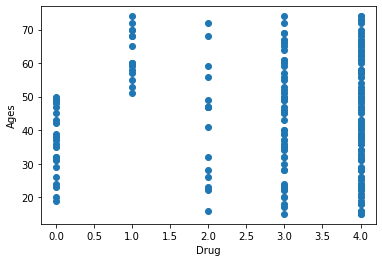

In [86]:
plt.scatter(df['Drug'], df['Age'])
plt.xlabel('Drug')
plt.ylabel('Ages')

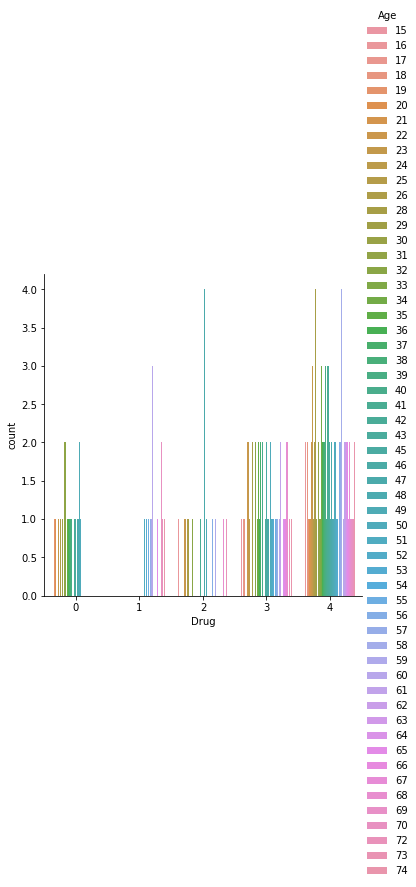

In [87]:
sns.catplot(x = 'Drug', kind = 'count', hue = 'Age', data = df[['Drug', 'Age']])

# Linear Regression

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x = df.drop('Drug', axis = 1)

In [90]:
x

,Age,Na_to_K,M,LOW,NORMAL,NORMAL
0,23,25.355,0,0,0,0
1,47,13.093,1,1,0,0
2,47,10.114,1,1,0,0
3,28,7.798,0,0,1,0
4,61,18.043,0,1,0,0
...,...,...,...,...,...,...
195,56,11.567,0,1,0,0
196,16,12.006,1,1,0,0
197,52,9.894,1,0,1,0
198,23,14.020,1,0,1,1


In [91]:
y = df['Drug']

In [92]:
y

0      4
1      2
2      2
3      3
4      4
      ..
195    2
196    2
197    3
198    3
199    3
Name: Drug, Length: 200, dtype: int32

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

In [94]:
x_train

,Age,Na_to_K,M,LOW,NORMAL,NORMAL
98,20,35.639,1,0,0,1
123,36,16.753,0,0,1,0
119,61,25.475,0,0,0,0
53,24,18.457,0,0,0,1
33,65,31.876,0,0,0,1
...,...,...,...,...,...,...
133,24,25.786,1,0,1,0
137,35,12.894,0,0,0,0
72,24,10.605,0,0,1,0
140,49,6.269,1,0,0,1


In [95]:
y_train

98     4
123    4
119    4
53     4
33     4
      ..
133    4
137    0
72     3
140    0
37     3
Name: Drug, Length: 150, dtype: int32

In [96]:
x_test

,Age,Na_to_K,M,LOW,NORMAL,NORMAL
58,60,10.091,1,0,1,1
40,73,19.221,0,0,1,0
34,53,14.133,1,0,1,0
102,28,13.127,0,1,0,0
184,18,37.188,0,0,0,0
198,23,14.020,1,0,1,1
95,36,11.424,1,1,0,1
4,61,18.043,0,1,0,0
29,45,17.951,1,1,0,0
168,51,23.003,0,1,0,1


In [97]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

In [98]:
lreg.fit(x_train, y_train)

LinearRegression()

In [99]:
lreg.score(x_test, y_test)

0.6337854108456095

In [120]:
from sklearn.metrics import r2_score
predictions = lreg.predict(x_test)
print("R-square Value: ", r2_score(y_test, predictions))

R-square Value:  0.6337854108456095


In [125]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, predictions)

0.5942151479078625

In [128]:
MSE = metrics.mean_squared_error(y_test, predictions)
MSE

0.5896054885385688

In [129]:
np.sqrt(MSE)

0.7678577267557896

In [150]:
test_residuals = y_test - predictions

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


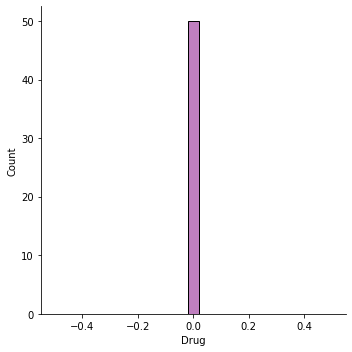

In [163]:
sns.displot(test_residuals, bins = 25, kde = True, color = 'purple')

# Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
dtc = DecisionTreeClassifier()

In [102]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [104]:
dtc.score(x_test, y_test)

1.0

In [130]:
from sklearn.metrics import r2_score
predictions = dtc.predict(x_test)
print("R-square Value: ", r2_score(y_test, predictions))

R-square Value:  1.0


In [131]:
from sklearn import metrics

In [132]:
MAE = metrics.mean_absolute_error(y_test, predictions)
MAE

0.0

In [133]:
MSE = metrics.mean_squared_error(y_test, predictions)
MSE

0.0

In [134]:
np.sqrt(MSE)

0.0

In [152]:
test_residuals = y_test - predictions

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


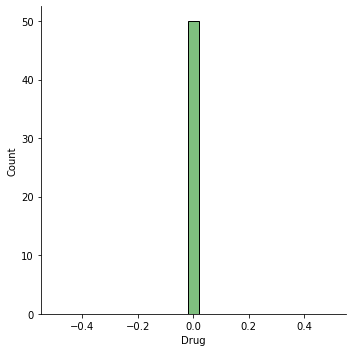

In [162]:
sns.displot(test_residuals, bins = 25, kde = True, color = 'green')

# Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
lr = LogisticRegression()

In [108]:
lr.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [109]:
lr.score(x_test, y_test)

0.92

In [135]:
from sklearn.metrics import r2_score
predictions = lr.predict(x_test)
print("R-square Value: ", r2_score(y_test, predictions))

R-square Value:  0.9503105590062112


In [136]:
from sklearn import metrics

In [137]:
metrics.mean_absolute_error(y_test, predictions)

0.08

In [138]:
MSE = metrics.mean_squared_error(y_test, predictions)
MSE

0.08

In [139]:
np.sqrt(MSE)

0.282842712474619

In [155]:
test_residuals = y_test - predictions

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


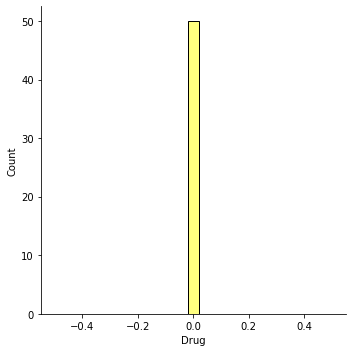

In [161]:
sns.displot(test_residuals, bins = 25, kde = True, color = 'yellow')

# Support Vector Machine

In [110]:
from sklearn.svm import SVC

In [111]:
sv = SVC()

In [112]:
sv.fit(x_train, y_train)

SVC()

In [113]:
sv.score(x_test, y_test)

0.7

In [140]:
from sklearn.metrics import r2_score
predictions = sv.predict(x_test)
print("R-square Value: ", r2_score(y_test, predictions))

R-square Value:  0.22981366459627328


In [141]:
from sklearn import metrics

In [142]:
metrics.mean_absolute_error(y_test, predictions)

0.56

In [143]:
MSE = metrics.mean_squared_error(y_test, predictions)
MSE

1.24

In [144]:
np.sqrt(MSE)

1.1135528725660044

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


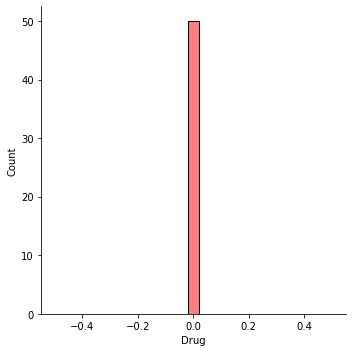

In [160]:
test_residuals = y_test - predictions
sns.displot(test_residuals, bins = 25, kde = True, color = 'red')

# Random Forest Classifier

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
rfc = RandomForestClassifier()

In [118]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [119]:
rfc.score(x_test, y_test)

1.0

In [145]:
from sklearn.metrics import r2_score
predictions = rfc.predict(x_test)
print("R-square Value: ", r2_score(y_test, predictions))

R-square Value:  1.0


In [146]:
from sklearn import metrics

In [147]:
metrics.mean_absolute_error(y_test, predictions)

0.0

In [148]:
MSE = metrics.mean_squared_error(y_test, predictions)
MSE

0.0

In [149]:
np.sqrt(MSE)

0.0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


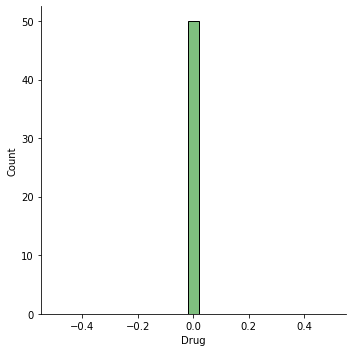

In [159]:
test_residuals = y_test - predictions
sns.displot(test_residuals, bins = 25, kde = True, color = 'green')